In [1]:
import numpy as np

Функция для отображения дендограммы

In [2]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Входные образы для кластеризации

In [3]:
x = [(89, 151), (114, 120), (156, 110), (163, 153), (148, 215), (170, 229), (319, 166), (290, 178), (282, 222)]
x = np.array(x)

NC = 3      # максимальное число кластеров (итоговых)

Агломеративная иерархическая кластеризация

Объекту передается число итоговых (выходных) кластеров, способ вычисления расстояний между кластерами и метрика для исходных данных (объектов). А, затем, алгоритм применяется ко входным данным

In [4]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=NC, linkage="ward")
x_pr = clustering.fit_predict(x)

На выходе получаем NumPy массив из набора объектов, сгруппированных по кластерам.

Отображение результата кластеризации и дендограммы

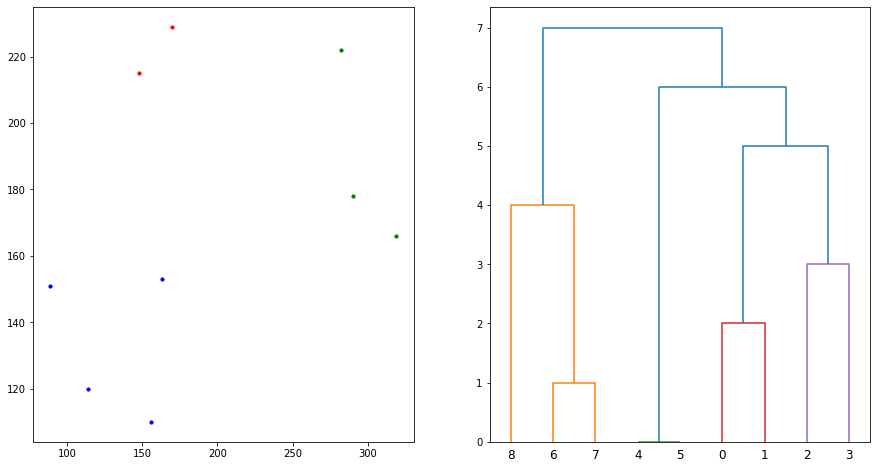

In [5]:
import matplotlib.pyplot as plt
from itertools import cycle
f, ax = plt.subplots(1, 2, figsize=(15,8))
for c, n in zip(cycle('bgrcmykgrcmykgrcmykgrcmykgrcmykgrcmyk'), range(NC)):
    clst = x[x_pr == n].T
    ax[0].scatter(clst[0], clst[1], s=10, color=c)

plot_dendrogram(clustering, ax=ax[1])
plt.show()

По вертикали дендограммы откладывается минимальное расстояние между кластерами, а по горизонтали – исходные данные (объекты). Глядя на этот график, мы сразу видим, в каком порядке происходило объединение данных в группы и насколько сильно кластеры отделены друг от друга по минимальному расстоянию.

Хороший алгоритм иерархической кластеризации должен давать дендограмму без внутренних пересечений и с ярко выраженными минимальными отступами между формируемыми кластерами. Дендограмма на рисунке соответствует этим критериям. Конечно, при выборе других метрик и способов вычисления расстояний между кластерами, дендограмма будет меняться.

Кроме оценки качества этот график показывает нам, где можно провести уровень отсечения для получения определенного числа выходных кластеров. Это очень удобно, особенно, если мы наперед не знаем, на сколько кластеров следует разбить входные данные. Дендограмма может помочь увидеть явные различия между разными группами на разных уровнях иерархии.